### Frozen Lake Game

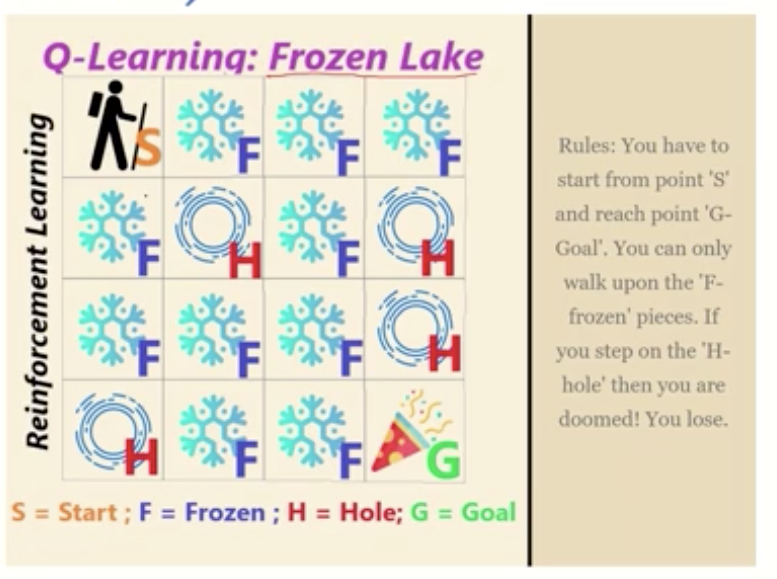

In [1]:
from IPython.display import Image
Image(filename='frozen_lake_environment.png') 

In [134]:
import numpy as np
import gym
import random # to choose b/w exploration and exploitation

In [135]:
# !pip install gym[toy_text]

In [136]:
env = gym.make('FrozenLake-v1', is_slippery = False) # keeping the game simple

In [137]:
# we have discrete 4 actions, up down right left
env.action_space

Discrete(4)

In [138]:
env.action_space.n

4

In [139]:
env.observation_space #4*4=16

Discrete(16)

In [140]:
env.observation_space.n

16

In [141]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
action_space_size, state_space_size

(4, 16)

In [142]:
qtable = np.zeros((state_space_size, action_space_size))
print("Q Table \n", qtable)

Q Table 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [143]:
total_episodes = 10000 # how many times we want the agent to experiement end to end in this game to update Q Table
learning_rate = 0.2
max_steps = 100
gamma = 0.9 # discount factor

epsilon = 1 # currently it is focussing on exploring more
max_epsilon = 1
min_epsilon = 0.01
decay_rate = 0.001

In [144]:
rewards = []

for episode in range(total_episodes):
    state = env.reset()[0]  # Initialize the environment and get the initial state for new version [0] is reqd
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        
        # Choose action using epsilon-greedy policy
        if random.uniform(0,1) > epsilon:
            action = np.argmax(qtable[state,:])  # exploitation
        else:
            action = env.action_space.sample()    # exploration
            
        # Take the action and observe the new state and reward
        new_state, reward, done, _, __ = env.step(action)
#         print(new_state)
        # Q-learning update
        max_new_state = np.max(qtable[new_state, :])
#         print(state)
        # qtable[state, action] = (1-learning_rate) * qtable[state, action] + learning_rate * (reward + gamma * max_new_state - qtable[state, action])
        qtable[state, action] = (1-learning_rate)*qtable[state, action]+learning_rate*(reward+gamma*max_new_state - qtable[state, action])
        # Accumulate total rewards for this episode
        total_rewards += reward
        
        # Update current state to new state
        state = new_state
        
        # If the episode is finished, break out of the loop
        if done:
            break
            
    # Decay epsilon after each episode for less exploration over time
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    
    # Store total rewards for this episode
    rewards.append(total_rewards)
    
# Print average score across all episodes
print("Average score over all episodes: ", str(sum(rewards) / total_episodes))

Average score over all episodes:  0.8839


In [145]:
print(qtable)

[[0.00415188 0.00922641 0.00922641 0.00415188]
 [0.00415188 0.         0.02050313 0.00922641]
 [0.00922638 0.0455625  0.00922534 0.02050312]
 [0.02050281 0.         0.00498218 0.00839091]
 [0.00922641 0.02050313 0.         0.00415188]
 [0.         0.         0.         0.        ]
 [0.         0.10125    0.         0.02050312]
 [0.         0.         0.         0.        ]
 [0.02050313 0.         0.0455625  0.00922641]
 [0.02050313 0.10125    0.10125    0.        ]
 [0.0455625  0.225      0.         0.0455625 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.10125    0.225      0.0455625 ]
 [0.10125    0.225      0.5        0.10125   ]
 [0.         0.         0.         0.        ]]


### Making the model i.e. qtable play

In [146]:
env.reset()


for episode in range(10):
    state = env.reset()[0]
    step = 0
    done = False
    
    print('Episode', episode+1)
    
    for step in range(max_steps):
        action = np.argmax(qtable[state, :])
        new_state, reward, done, _, __ = env.step(action)
        
        if done:
            env.render()
            print("The number of steps: ", step)
            break
            
        state = new_state
        
env.close()

Episode 1
The number of steps:  5
Episode 2
The number of steps:  5
Episode 3
The number of steps:  5
Episode 4
The number of steps:  5
Episode 5
The number of steps:  5
Episode 6
The number of steps:  5
Episode 7
The number of steps:  5
Episode 8
The number of steps:  5
Episode 9
The number of steps:  5
Episode 10
The number of steps:  5


In [147]:
# We played and won the game 10 times, it never fell into the hole.

### SARSA